#### TP 1

## Objectifs

- Analyser et travailler avec des fichiers CSV, TSV et JSON
- Interroger des sources de données externes
- Analyses de données

### Exercices

1.  Analyse et lecture de fichiers CSV/TSV
2.  Analyse et lecture des fichiers JSON
3.  Interrogation de sources de données externes (API)
4.  Effectuer des analyses de données classiques


## Captures d'écran 

Des captures d'écran ont été fournies afin que vous puissiez vérifier et comparer si le résultat que vous obtenez correspond à ce que nous attendons de l'étape (ou de l'exercice) en question.

## Exercice 1 ★



Nous installons d'abord les packages nécessaires. Dans les notebooks Jupyter, vous pouvez utiliser la commande `!` pour exécuter des commandes shell directement depuis une cellule du notebook.  
Pour installer des packages Python tels que NumPy et pandas, vous pouvez utiliser la commande suivante :

In [ ]:
!pip3 install numpy pandas matplotlib sparqlwrapper

Pour importer les bibliothèques NumPy et pandas dans un notebook Jupyter, utilisez les instructions d'importation Python suivantes :

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plot
import SPARQLWrapper as sw

L'attribut `__version__` est un moyen courant d'accéder aux informations de version d'un package Python.

In [ ]:
print(np.__version__)
print(pd.__version__)
print(plot.__version__)
print(sw.__version__)

Effectuez les exercices donnés dans le [TP 0](../TP0/tp0.ipynb).

## Exercice 2 ★


La plupart du temps, nous travaillons avec des fichiers CSV (comma-separated values) pour l'analyse des données. Un fichier CSV est constitué d'une ou plusieurs lignes et chaque ligne comporte une ou plusieurs valeurs séparées par des virgules. On peut considérer chaque ligne comme une rangée et chaque valeur d'une ligne comme une valeur de colonne. La première ligne est parfois utilisée pour décrire les noms des colonnes.


Copier le fichier
[pl.csv](../../data/pl.csv) dans votre répertoire de travail actuel (où vous exécutez Jupyter : TP1) et utilisez le code suivant pour analyser le fichier csv. Remarquez les noms de colonnes et les types de données (U100, i4), où U100 correspond à une chaîne unicode de 100 caractères et i4 correspond à un entier signé de 32 bits.

Veuillez consulter la liste complète des dtypes [ici](https://numpy.org/doc/stable/reference/arrays.dtypes.html).


In [ ]:
import numpy as np

dataset = np.loadtxt(
    "../../data/pl.csv",  # Remplacez cette valeur par le chemin d'accès de votre fichier CSV.
    dtype={"names": ("name", "year"), "formats": ("U100", "i4")},
    skiprows=1,  # passez la première ligne, puisque c'est l'en-tête
    delimiter=",",  # le séparateur est une virgule puisqu'il s'agit d'un fichier CSV.
    encoding="UTF-8",  # encodage UTF-8
)
print(dataset)

- **`np.loadtxt`** : Cette fonction charge des données à partir d’un fichier texte, chaque ligne du fichier étant convertie en un élément d’un tableau NumPy.  
- **`"../data/pl.csv"`** : Le chemin vers le fichier CSV. Vous devez le remplacer par le chemin réel où se trouve votre fichier CSV.  
- **`dtype={"names": ("name", "year"), "formats": ("U100", "i4")}`** : Spécifie le type de données du tableau NumPy résultant. Ici, `dtype` est défini comme un dictionnaire avec :  
  - `names` : Un tuple indiquant les noms des colonnes.  
  - `formats` : Un tuple indiquant le type de données de chaque colonne. `"U100"` représente une chaîne Unicode de longueur maximale 100, et `"i4"` représente un entier sur 4 octets.  
- **`skiprows=1`** : Ce paramètre permet d’ignorer la première ligne du fichier CSV, supposée être l’en-tête.  
- **`delimiter=","`** : Spécifie le délimiteur séparant les valeurs dans le fichier CSV. Ici, il s'agit d'une virgule.  
- **`encoding="UTF-8"`** : Spécifie l’encodage du fichier. UTF-8 est un encodage couramment utilisé pour les fichiers texte.

### Remarques importantes :  

1. **Chemin du fichier** : Assurez-vous que le chemin du fichier (`"../data/pl.csv"`) est correct par rapport à votre notebook Jupyter ou votre script. Vous devrez peut-être l’ajuster en fonction de l’emplacement réel de votre fichier CSV.  
2. **Structure du fichier CSV** : Le fichier CSV doit contenir une ligne d’en-tête correspondant aux noms de colonnes spécifiés dans le paramètre `dtype`, suivie des lignes de données.  
3. **Types de données des colonnes** : Vérifiez que les types de données (`"U100"` pour les chaînes de caractères et `"i4"` pour les entiers) correspondent bien aux données réelles de votre fichier CSV.

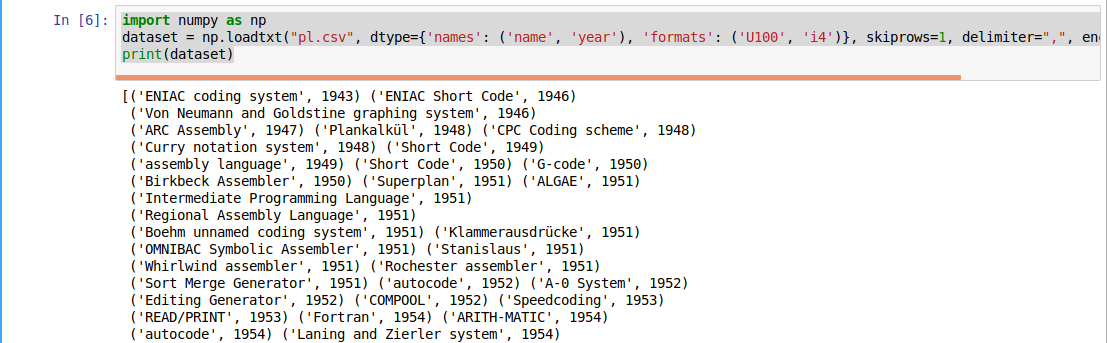

[Soutien du CSV en numpy](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html)
(**Ref:**
(https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html))
est différent du défaut de Python [CSV
reader](https://docs.python.org/3.9/library/csv.html) (**Ref:**
(https://docs.python.org/3.9/library/csv.html))
en raison de sa capacité à prendre en charge les [types de données](https://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html)
(**Ref:**
(https://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html)).
Avant de continuer, examinez en profondeur
[numpy.loadtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html)
(**Ref:**
(https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html)).

  

Copier le fichier
[pl.tsv](../../data/pl.tsv) dans votre répertoire de travail actuel et utilisez le code suivant pour analyser le fichier TSV.



In [ ]:
import numpy as np

dataset = np.loadtxt(
    "../../data/pl.tsv",  # Remplacez cette valeur par le chemin d'accès de votre fichier TSV.
    dtype={"names": ("name", "year"), "formats": ("U100", "i4")},
    skiprows=1,
    delimiter="\t",  # le séparateur est '\t' puisqu'il s'agit d'un fichier TSV.
    encoding="UTF-8",
)
print(dataset)

Les changements dans le code ci-dessus par rapport au précédent. Un fichier TSV est un fichier séparé par des tabulations, c'est-à-dire que les valeurs des colonnes sont séparées par un
tabulation ((\t)).


- **`np.loadtxt`** : Cette fonction charge des données à partir d’un fichier texte, chaque ligne du fichier étant convertie en un élément d’un tableau NumPy.  
- **`"../data/pl.tsv"`** : Le chemin vers le fichier TSV. Vous devez le remplacer par le chemin réel où se trouve votre fichier TSV.  
- **`dtype={"names": ("name", "year"), "formats": ("U100", "i4")}`** : Spécifie le type de données du tableau NumPy résultant. Ici, `dtype` est défini comme un dictionnaire avec :  
  - `names` : Un tuple indiquant les noms des colonnes.  
  - `formats` : Un tuple indiquant le type de données de chaque colonne. `"U100"` représente une chaîne Unicode de longueur maximale 100, et `"i4"` représente un entier sur 4 octets.  
- **`skiprows=1`** : Ce paramètre permet d’ignorer la première ligne du fichier TSV, supposée être l’en-tête.  
- **`delimiter="\t"`** : Spécifie le délimiteur séparant les valeurs dans le fichier TSV. Ici, il s'agit d'une tabulation.  
- **`encoding="UTF-8"`** : Spécifie l’encodage du fichier. UTF-8 est un encodage couramment utilisé pour les fichiers texte.

Pour compter le nombre de lignes dans votre jeu de données, vous pouvez utiliser `len()`.

In [ ]:
print(len(dataset))

Vous pouvez également afficher la sortie des variables et méthodes dans un Notebook sans `print()`

In [ ]:
len(dataset)

### Explorer l'accès aux données colonne par colonne  

Extraire et afficher uniquement la colonne `"name"` du jeu de données.

In [ ]:
dataset["name"]

Extraire et afficher uniquement la colonne `"year"` du jeu de données.

In [ ]:
dataset["year"]

### Filtrer les données par année

Trouvez et affichez toutes les lignes où l'année est supérieure à 1960.

In [ ]:
filtered_data = dataset[dataset["year"] > 1960]
filtered_data

### Gérer les données manquantes ou incorrectes

Vérifiez le code suivant qui contient certaines valeurs manquantes.

In [ ]:
# Enregistrez un fichier CSV modifié avec une valeur manquante (manuellement ou via script)
np.savetxt("pl_missing.csv", [("Simula", 1962), ("Swift", "")], header="name,year", delimiter=",", fmt="%s")

# Tentez de charger avec np.loadtxt (cela provoquera une erreur)
try:
    dataset_with_missing_values = np.loadtxt("pl_missing.csv", dtype={"names": ("name", "year"), "formats": ("U100", "i4")}, delimiter=",")
except ValueError as e:
    print("Erreur :", e)


In [ ]:
# Charger avec np.genfromtxt (gère les valeurs manquantes)
dataset_with_missing_values = np.genfromtxt("pl_missing.csv", {"names": ("name", "year"), "formats": ("U100", "i4")}, delimiter=",", encoding="UTF-8")
dataset_with_missing_values

Utiliser `filling_values` pour une colonne spécifique

In [ ]:
# Charger le jeu de données avec des valeurs par défaut pour les entrées manquantes
dataset_with_missing_values = np.genfromtxt(
    "pl_missing.csv",
    dtype=[("name", "U100"), ("year", "i4")],
    delimiter=",",
    names=True,  # La première ligne contient les noms des colonnes
    encoding="UTF-8",
    missing_values="",  # Traiter les valeurs vides comme manquantes
    filling_values={"year": 0}  # Remplacer les années manquantes par 0
)

dataset_with_missing_values


`np.loadtxt()` générera une erreur en raison des valeurs manquantes. `np.genfromtxt()` chargera le jeu de données, en remplaçant les valeurs manquantes par `nan` ou une valeur par défaut.

In [ ]:
### Convertir les données en DataFrame Pandas

In [ ]:
import pandas as pd

# Convertir le tableau structuré NumPy en DataFrame Pandas
df = pd.DataFrame(dataset)

# Afficher le DataFrame
df


**Question** : Quelle est la différence entre `np.loadtxt()` et `np.genfromtxt()` lors de la lecture de fichiers CSV ? Quand faut-il privilégier l'un par rapport à l'autre ?

## Exercice 3 ★★

La plupart des sources de données externes peuvent fournir leurs données au format JSON.
Notre prochain exercice consiste à analyser les fichiers JSON. Copiez le fichier
[pl.json](../../data/pl.json) à votre répertoire de travail actuel et utilisez le code suivant pour analyser le fichier JSON. Dans cet exercice, nous utilisons [Pandas python
package](https://pandas.pydata.org/pandas-docs/stable/) (**Ref:**
(https://pandas.pydata.org/pandas-docs/stable/)) d'analyser le fichier JSON pour obtenir un [Pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)
(**Ref:**
(https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)).
Essayez d'utiliser des méthodes comme
[transpose](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.transpose.html#pandas.DataFrame.transpose)
(**Ref:**
(https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.transpose.html#pandas.DataFrame.transpose)),
[count](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.count.html#pandas.DataFrame.count)
(**Ref:**
(https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.count.html#pandas.DataFrame.count))
etc.

Avant de continuer cet exercice, veuillez vous entraîner à travailler avec des pandas.
Consultez [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html)
(**Ref:** (https://pandas.pydata.org/pandas-docs/stable/10min.html)).



In [ ]:
from pandas import json_normalize
import pandas as pd
import json

# Charger les données JSON à partir d'un fichier
data = json.load(open("../../data/pl.json"))

# Convertir les données JSON en un DataFrame pandas
dataframe = json_normalize(data)

print(dataframe)


Ce code utilise la bibliothèque pandas de Python pour travailler avec des données JSON.

*. **Imports** :  
   - `from pandas import json_normalize` : Importe la fonction `json_normalize` de la bibliothèque pandas. Cette fonction est utilisée pour aplatir les données JSON en un DataFrame.  
   - `import pandas as pd` : Importe la bibliothèque pandas avec l'alias `pd`, qui est une convention courante.  
   - `import json` : Importe le module intégré `json` de Python pour manipuler les données JSON.

*. **Chargement des données JSON** :  
   - `data = json.load(open("../data/pl.json"))` : Ouvre un fichier JSON situé à `"../data/pl.json"` et charge son contenu dans la variable `data`. La fonction `json.load()` lit le fichier JSON et le transforme en un dictionnaire Python.

*. **Normalisation du JSON en DataFrame** :  
   - `dataframe = json_normalize(data)` : Utilise la fonction `json_normalize()` de pandas pour convertir les données JSON imbriquées (`data`) en une structure plate de type tableau, appelée DataFrame. Cette étape est particulièrement utile pour analyser des données JSON structurées où des objets ou tableaux imbriqués doivent être représentés sous forme tabulaire.

Et l'affichage sans `print()`

In [ ]:
dataframe

Pour afficher les valeurs de la colonne **year**:

In [ ]:
dataframe["year"]

Pour afficher les valeurs de la colonne **languageLabel**:

In [ ]:
dataframe["languageLabel"]

Obtenir des informations importantes comme le nombre, le minimum, le maximum en utilisant `describe()`

In [ ]:
dataframe.describe()

La méthode `dataframe.describe()` de pandas génère des statistiques descriptives qui résument la tendance centrale, la dispersion et la forme de la distribution d'un jeu de données. Voici ce que chaque partie inclut généralement :

1. **Count** : Nombre d'observations non-nulles (lignes) dans chaque colonne.
   
2. **Mean** : Valeur moyenne de chaque colonne numérique.

3. **Std (Écart-type)** : Mesure de la dispersion ou de l'étendue des valeurs dans chaque colonne numérique.

4. **Min** : La plus petite valeur dans chaque colonne numérique.

5. **25% (Percentile)** : La valeur en dessous de laquelle 25% des observations tombent (1er quartile).

6. **50% (Médiane)** : La médiane ou le 50e percentile.

7. **75% (Percentile)** : La valeur en dessous de laquelle 75% des observations tombent (3e quartile).

8. **Max** : La plus grande valeur dans chaque colonne numérique.

Lorsque vous appelez `describe()` sur un DataFrame pandas (`dataframe` dans ce cas), il analyse uniquement les colonnes numériques par défaut et fournit le résumé statistique pour chacune de ces colonnes. Les colonnes non numériques sont ignorées, sauf si elles sont spécifiquement incluses en utilisant des paramètres supplémentaires.

Cette méthode est utile pour obtenir rapidement un aperçu des valeurs numériques de votre jeu de données, identifier les valeurs aberrantes, comprendre la distribution de vos données, etc.

Pour obtenir les valeurs uniques de la colonne **year** :

In [ ]:
dataframe["year"].unique()

Pour obtenir les valeurs uniques de la colonne **languageLabel** :

In [ ]:
dataframe["languageLabel"].unique()

Pour trier les valeurs par une ou plusieurs colonnes

In [ ]:
dataframe.sort_values(["year"])

In [ ]:
dataframe.sort_values(["year", "languageLabel"])

In [ ]:
dataframe.sort_values(["languageLabel"])

Pour obtenir les types de données des colonnes

In [ ]:
dataframe.dtypes

L'attribut `dataframe.dtypes` dans pandas retourne les types de données de chaque colonne dans le DataFrame `dataframe`. Il fournit des informations sur la manière dont pandas a interprété les données provenant du JSON (ou de toute autre source) lors de sa lecture initiale et de son processus de normalisation. Voici ce que vous verrez généralement :

- **Types numériques** : Entiers (`int64`), nombres à virgule flottante (`float64`).
- **Type Objet** : Typiquement des chaînes de caractères (`object`), mais peut également inclure d'autres objets Python.
- **Types Date/Heure** : Si applicable, pandas reconnaîtra et étiquettera les données de date/heure de manière appropriée (`datetime64`).
- **Types Catégoriels** : Si pandas identifie une colonne avec un petit nombre de valeurs uniques, il peut lui attribuer un type `category`, ce qui peut optimiser l'utilisation de la mémoire et accélérer certaines opérations.

### Gestion des valeurs manquantes
- Identifier les valeurs manquantes dans le jeu de données.
- Remplacer les valeurs manquantes dans la colonne "year" par l'année médiane.
- Remplacer les valeurs manquantes dans les colonnes catégorielles (par exemple, "languageLabel") par "Inconnu".

In [ ]:
dataframe["year"] = pd.to_numeric(dataframe["year"], errors="coerce")

# Identifier les valeurs manquantes
print(dataframe.isnull().sum())

# Remplacer les valeurs manquantes dans "year" par la valeur médiane
dataframe["year"].fillna(dataframe["year"].median(), inplace=True)
# Remplacer les valeurs manquantes dans "languageLabel" par "Inconnu"
dataframe["languageLabel"].fillna("Inconnu", inplace=True)


### Filtrage des données

- Extraire toutes les lignes où "year" est supérieur à 1960.
- Extraire toutes les lignes où "languageLabel" est "BCPL".

In [ ]:
dataframe = dataframe.astype(dtype={"year": "<i4", "languageLabel": "<U200"})

In [ ]:
# Filtrer les lignes où "year" est supérieur à 1960
filtered_year = dataframe[dataframe["year"] > 1960]
filtered_year


In [ ]:
# Filtrer les lignes où "languageLabel" est "BCPL"
filtered_language = dataframe[dataframe["languageLabel"] == "BCPL"]
print(filtered_language)


### Groupement et agrégation
- Compter combien d'entrées existent par "languageLabel".
- Compter combien d'entrées existent par "year".

In [ ]:

# Compter combien d'entrées existent par "languageLabel"
language_label_counts = dataframe["languageLabel"].value_counts()

# Compter combien d'entrées existent par "year"
year_counts = dataframe["year"].value_counts()


### Exportation des données

Sauvegarder le DataFrame modifié dans un nouveau fichier JSON.

In [ ]:
# Sauvegarder dans un fichier JSON
dataframe.to_json("modified_pl.json", orient="records", indent=4)


Enregistrez-le également sous forme de fichier CSV.

In [ ]:
# Enregistrer dans un fichier CSV
dataframe.to_csv("modified_pl.csv", index=False)


**Question :** Quelle est la différence entre `json.load()` et `json.loads()` en Python ?

## Exercice 4 ★★

Dans cet exercice, nous examinerons comment télécharger des données à partir
des sources de données externes utilisant des interfaces d'interrogation spéciales. Par exemple, les données ci-dessus ont été obtenues à partir de [Wikidata query](https://query.wikidata.org/) 

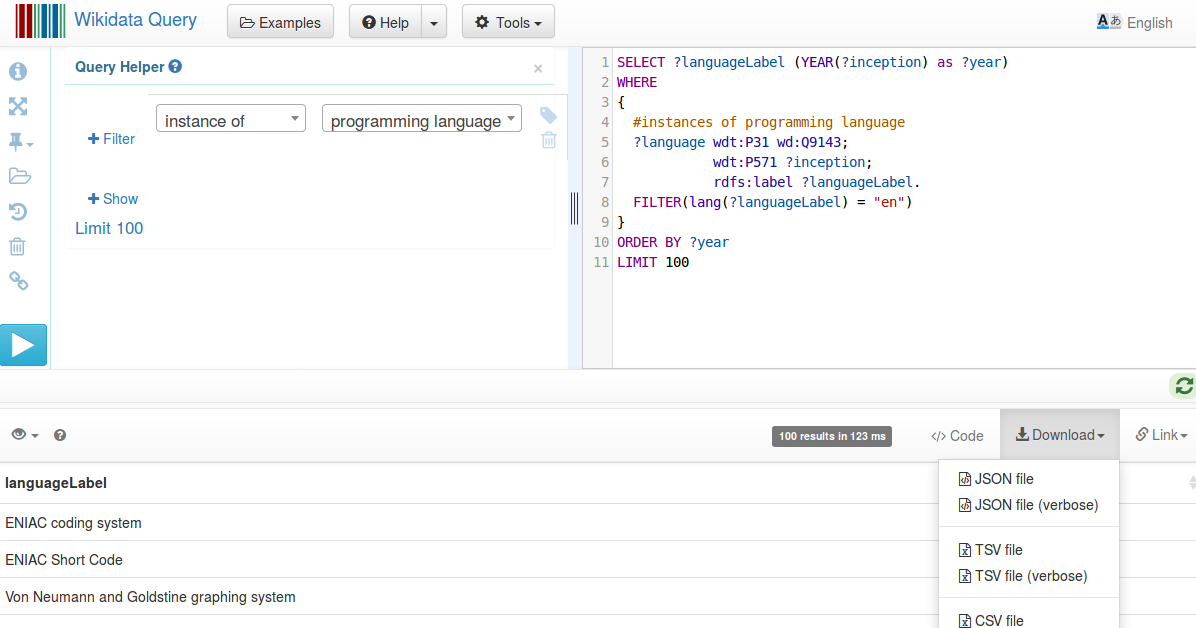

Vous trouverez ci-dessous le code permettant de lire les données provenant d'une source externe. Utilisez ce
[url](https://query.wikidata.org/sparql?query=SELECT%20%3FlanguageLabel%20(YEAR(%3Finception)%20as%20%3Fyear)%0AWHERE%0A%7B%0A%20%20%23instances%20of%20programming%20language%0A%20%20%3Flanguage%20wdt%3AP31%20wd%3AQ9143%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20wdt%3AP571%20%3Finception%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20rdfs%3Alabel%20%3FlanguageLabel.%0A%20%20FILTER(lang(%3FlanguageLabel)%20%3D%20%22en%22)%0A%7D%0AORDER%20BY%20%3Fyear%0ALIMIT%20100&format=json):
(https://query.wikidata.org/sparql?query=SELECT%20%3FlanguageLabel%20(YEAR(%3Finception)%20as%20%3Fyear)%0AWHERE%0A%7B%0A%20%20%23instances%20of%20programming%20language%0A%20%20%3Flanguage%20wdt%3AP31%20wd%3AQ9143%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20wdt%3AP571%20%3Finception%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20rdfs%3Alabel%20%3FlanguageLabel.%0A%20%20FILTER(lang(%3FlanguageLabel)%20%3D%20%22en%22)%0A%7D%0AORDER%20BY%20%3Fyear%0ALIMIT%20100&format=json).



In [ ]:
import urllib.request
import json
import pandas as pd

url = "https://query.wikidata.org/sparql?query=SELECT%20%3FlanguageLabel%20(YEAR(%3Finception)%20as%20%3Fyear)%0AWHERE%0A%7B%0A%20%20%23instances%20of%20programming%20language%0A%20%20%3Flanguage%20wdt%3AP31%20wd%3AQ9143%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20wdt%3AP571%20%3Finception%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20rdfs%3Alabel%20%3FlanguageLabel.%0A%20%20FILTER(lang(%3FlanguageLabel)%20%3D%20%22en%22)%0A%7D%0AORDER%20BY%20%3Fyear%0ALIMIT%20100&format=json"
response = urllib.request.urlopen(url)
responsedata = json.loads(response.read().decode("utf-8"))

array = []

for data in responsedata["results"]["bindings"]:
    array.append([data["year"]["value"], data["languageLabel"]["value"]])

dataframe = pd.DataFrame(array, columns=["year", "languageLabel"])
dataframe = dataframe.astype(dtype={"year": "<i4", "languageLabel": "<U200"})
print(dataframe)

In [ ]:
dataframe

In [ ]:
dataframe["year"].describe()

In [ ]:
dataframe["languageLabel"].describe()

In [ ]:
dataframe.dtypes

### Filtrer les données pour une période spécifique

Vous pouvez filtrer les données pour obtenir les langages de programmation inventés dans une plage d'années spécifique (par exemple, entre 1980 et 2000). Cela peut être utile si vous êtes uniquement intéressé par les langages créés pendant une période donnée.


In [ ]:
# Filtrer le DataFrame pour les langages créés entre 1980 et 2000
filtered_df = dataframe[(dataframe["year"] >= 1980) & (dataframe["year"] <= 2000)]

# Afficher les données filtrées
print(filtered_df)

### Compter les langages par année 

Une opération utile pourrait être de compter combien de langages ont été inventés chaque année. Cela peut vous donner une meilleure compréhension des tendances dans la création des langages de programmation.

In [ ]:
# Compter le nombre de langages créés par an
languages_per_year = dataframe.groupby("year").size()

# Afficher le résultat
print(languages_per_year)


### Identifier les langages ayant la date de création la plus récente

Une autre question intéressante à poser pourrait être de savoir quel langage a la date de création la plus récente. Nous pouvons trier le DataFrame par année et trouver les dernières entrées.

In [ ]:
# Trier le DataFrame par année et obtenir les 10 langages les plus récents
recent_languages = dataframe.sort_values("year", ascending=False).head(10)

# Afficher les 10 langages les plus récents
print(recent_languages)


**Question**

Quelle est la tendance du nombre de langages de programmation créés au fil du temps ?

Pour répondre à cette question, nous devons filtrer les données pour les langages créés entre 1960 et 2000, puis identifier l'année où le plus grand nombre de langages de programmation a été créé. Ensuite, nous allons créer un nouveau DataFrame contenant les 5 langages de programmation les plus populaires (par nombre d'occurrences) pendant cette période.

## Exercice 5 ★★★

Ce exercice utilisera quelques analyses de données de base. Poursuivant avec le code de l'exercice 1.4, comptons le nombre de langages de programmation sortis en un an.

In [ ]:
grouped = dataframe.groupby("year").count()
grouped

Vous pouvez également utiliser plusieurs fonctions d'agrégation en utilisant agg()

In [ ]:
grouped = dataframe.groupby("year").agg(["count"])
grouped

Jusqu'à présent, nous avons travaillé avec des tableaux à deux colonnes. Maintenant, nous nous concentrons sur des tableaux à trois colonnes (langage de programmation, année, paradigme). Copiez le fichier [plparadigm.json](../../data/plparadigm.json) dans votre répertoire de travail. Et testez le programme suivant.

In [ ]:
from pandas import json_normalize
import pandas as pd
import json

# Charger les données JSON depuis un fichier
jsondata = json.load(open("../../data/plparadigm.json"))

# Créer une liste vide pour stocker les données temporaires
array = []

# Boucle à travers chaque élément des données JSON
for data in jsondata:
    # Extraire des valeurs spécifiques de chaque élément et les ajouter à la liste
    # En supposant que "year", "languageLabel" et "paradigmLabel" sont des clés dans les données JSON
    array.append([data["year"], data["languageLabel"], data["paradigmLabel"]])

# Créer un DataFrame pandas à partir de la liste avec des colonnes nommées
dataframe = pd.DataFrame(array, columns=["year", "languageLabel", "paradigmLabel"])

# Définir les types de données pour les colonnes du DataFrame
# Cela garantit un stockage efficace et évite les erreurs potentielles lors des opérations
dataframe = dataframe.astype(
    dtype={"year": "int64", "languageLabel": "<U200", "paradigmLabel": "<U200"}
)

# Regrouper le DataFrame par les colonnes "year" et "paradigmLabel"
grouped = dataframe


Testez maintenant le programme suivant. Comparez la différence de rendement.

In [ ]:
grouped = dataframe.groupby(["paradigmLabel", "year"]).agg(["count"])
grouped

**Question 1**

Votre prochain objectif est de lancer la requête suivante pour obtenir la population
des informations sur les différents pays (limitées à 10000 lignes). Exécutez le
suite à la requête sur [Wikidata query service](https://query.wikidata.org)
et téléchargez le fichier JSON.


```
SELECT DISTINCT ?countryLabel (YEAR(?date) as ?year) ?population
WHERE {
 ?country wdt:P31 wd:Q6256; #Country 
   p:P1082 ?populationStatement;
  rdfs:label ?countryLabel. #Label
 ?populationStatement ps:P1082 ?population; #population
  pq:P585 ?date. #period in time
 FILTER(lang(?countryLabel)="en") #Label in English
}
ORDER by ?countryLabel ?year
LIMIT 1000
```

Maintenant, calculez et affichez les informations suivantes (en utilisant différentes
[opérations disponibles dans la bibliothèque des pandas] (https://pandas.pydata.org/pandas-docs/stable/10min.html)
(**Ref:**
(https://pandas.pydata.org/pandas-docs/stable/10min.html))):

1.  La population des pays dans l'ordre alphabétique de leur nom et
    par ordre croissant d'année.
2.  La dernière population disponible de chaque pays
3.  Le pays ayant la population la plus faible et la plus élevée (compte tenu de la
    population la plus récente)

**Question 2** :

Votre objectif suivant est d'exécuter la requête suivante pour obtenir des informations liées aux articles scientifiques publiés après 2010 (limité à 5000 lignes). Exécutez la requête suivante sur le [service de requêtes Wikidata](https://query-scholarly.wikidata.org/) et téléchargez le fichier JSON.

Cela vous fournira les informations suivantes concernant les articles scientifiques : titre, sujet principal et année de publication.

**Remarque** : Veuillez noter que l'URL pour interroger les articles scientifiques est [https://query-scholarly.wikidata.org/](https://query-scholarly.wikidata.org/).

```
SELECT ?title ?subject ?year
{
  ?article wdt:P31 wd:Q13442814; #scientific article
           wdt:P1476 ?title; #title of the article
           wdt:P921 ?subject; #main subject
           wdt:P577 ?date. #publication date
  BIND(YEAR(?date) as ?year).
  FILTER(lang(?title) = "en" && ?year>2010)
}
LIMIT 5000
```

Maintenant, calculez et affichez les informations suivantes (en utilisant diverses [opérations disponibles dans la bibliothèque des pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html)
(**Ref:**
(https://pandas.pydata.org/pandas-docs/stable/10min.html))):

1.  Le nombre d'articles publiés sur différents sujets chaque année.
2.  Principal sujet d'intérêt pour la communauté scientifique chaque année (sur la base
    sur les résultats de l'interrogation ci-dessus).
3.  Les 10 principaux sujets d'intérêt pour la communauté scientifique (sur la base
    les résultats de l'interrogation ci-dessus) depuis 2010.

**Indice**: Regardez les fonctions groupby, reset_index, head, tail, sort_values, count de Pandas



**Remarque**: Si vous obtenez des erreurs de dépassement de temps (time-out), veuillez modifier la LIMITE à des valeurs inférieures (1000, 2000, 5000).

## Exercice 6 ★★★

Dans notre dernier exercice, nous allons interroger Wikidata et obtenir les URL des images. Ensuite, nous téléchargerons ces images.

In [ ]:
!pip install sparqlwrapper

In [ ]:
import sys
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

# Get cities
query = """SELECT DISTINCT ?grandeville ?grandevilleLabel ?pays ?paysLabel ?image {
  ?grandeville wdt:P31 wd:Q1549591;
               wdt:P17 ?pays;
               wdt:P18 ?image.
 SERVICE wikibase:label { bd:serviceParam wikibase:language "fr". }
}
LIMIT 10"""


def get_results(endpoint_url, query):
    user_agent = "WDQS-example Python/%s.%s" % (
        sys.version_info[0],
        sys.version_info[1],
    )
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    return sparql.query().convert()


array = []
results = get_results(endpoint_url, query)

for result in results["results"]["bindings"]:
    array.append(
        (
            result["grandevilleLabel"]["value"],
            result["paysLabel"]["value"],
            result["image"]["value"],
        )
    )

In [ ]:
dataframe = pd.DataFrame(array, columns=["ville", "pays", "image"])
dataframe = dataframe.astype(
    dtype={"ville": "<U200", "pays": "<U200", "image": "<U200"}
)
dataframe

Nous allons maintenant télécharger les images

In [ ]:
import requests
import shutil
import os


def download_image(url):

    headers = {"User-Agent": "Mozilla/5.0"}
    request = requests.get(url, allow_redirects=True, headers=headers, stream=True)
    if request.status_code == 200:
        with open(os.path.basename(url), "wb") as image:
            request.raw.decode_content = True
            shutil.copyfileobj(request.raw, image)
    return request.status_code

In [ ]:
dataframe.image.apply(download_image)

**Question 1**: 

Modifiez le code ci-dessus et téléchargez des images liées au sujet de votre choix (villes, monuments historiques, fleurs, bâtiments, etc.).

**Question 2**

Votre objectif est de récupérer les données des gratte-ciel ([Q11303](https://www.wikidata.org/wiki/Q11303)) (nom, pays, image, hauteur) depuis Wikidata, puis de télécharger et filtrer les images en fonction de leur taille. Utilisez le code de traitement d'image ci-dessous pour classifier les gratte-ciel en fonction du contraste de leur skyline (images de jour vs. images de nuit).

Quel pays possède le plus grand nombre de gratte-ciel apparaissant sur des images de nuit ?

In [ ]:
! pip install opencv-python

In [ ]:
import cv2
import numpy as np

def classifier_jour_nuit(chemin_image):
    img = cv2.imread(chemin_image, cv2.IMREAD_GRAYSCALE)  # Conversion en niveaux de gris
    luminosité = np.mean(img)  # Calcul de la luminosité moyenne des pixels

    if luminosité < 60:  # Les images sombres sont considérées comme des images de nuit
        return "nuit"
    return "jour"
